<img src="image.jpg" alt="Francis and Bae" title="Francis and Bae" />

# Text Exploratory Analysis (My Chat with Bae)

This is meputing my data cleaning and text preprocessing skill into use while using wordcloud for visualisation.

### The Data

This is the historical WhatsApp chat data with my girlfriend exported using the whatsApp exporting option as .txt file and as a raw unorganised text, we will see what we can do with it. The data starts from December 2017 to June 2019. The data was exported twice, not for the sake of this analysis but for safe keeping but now I believe it will be a useful data to practice text processing.

Let's get started.

## Initial WordCloud

I will be making a word cloud on the rough data as it is without doing any prior preprocessing on the two dataset.We wont do anything on the data other than removing some few uniteresting words.

In [2]:
# importing useful libraries, that we might use
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display
import fileupload
import re
import requests
from PIL import Image
import io
import sys
import glob
import os
sns.set_style('whitegrid')

Enabling notebook extension fileupload/extension...
      - Validating: ok


In [3]:
os.listdir('C:/Users/USER/Jupyter/Personal Data') #Checking our data

['clean_text.txt',
 'DOC-20200309-WA0004.png',
 "utf-8''C1M6L2_Final_Project_V3.ipynb",
 'WhatsApp Chat with bae.txt',
 'WhatsApp Chat with bae2.txt']

To upload the text file, run the following cell that contains all the code for a custom uploader widget. Once you run this cell, a "Browse" button should appear below it. Click this button and navigate the window to locate your saved text file.
### Note
**that the upload function only takes .txt files.**

In [4]:
# This is the uploader widget

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global chat_history
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        chat_history = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

Uploaded `WhatsApp Chat with bae.txt` (1678.41 kB)


The uploader widget saved the contents of the chat txt file into a string object named **file_contents** that your word cloud script can process. 

Below, we will try to strip the chat off *uninteresting_words* and *punctuations* then convert the remaining content of the file into a dictionary, which contains the words as keys and the number of times the words appear as values.

Let's take a look at the code

In [5]:
fontpath = None
def calculate_frequencies(chat_history):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''1-9!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "on", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just",\
    'pm', 'am', 'media', 'not', 'found', 'oh', 'so']
    
    # LEARNER CODE START HERE
    word_dict = {}
    new_s = [i.lower() for i in chat_history if i.isalnum() or i.isalpha() or i.isspace()]
    word = ''.join(new_s)
    def remove_punctuation(s):
        return re.sub(r'[^\w 0-9]|_', '', s)
    word = remove_punctuation(word).split()
    for i in word:
        if i in uninteresting_words:
            pass    
        else:
            word_dict[i] = word_dict.get(i, 0) + 1
    #wordcloud
    cloud = wordcloud.WordCloud(font_path=fontpath, width=800, height=400, scale=9, max_words=200, 
                                stopwords=wordcloud.STOPWORDS, background_color='white', font_step=1, 
                                colormap='viridis', min_word_length=4)
    cloud.generate_from_frequencies(word_dict)
    return cloud.to_array()

There are a number of interesting things we can do with word cloud, you can read about them here
 =========> [DataCamp WordCloud Turorial](https://www.datacamp.com/community/tutorials/wordcloud-python)

In [6]:
# Display your wordcloud image

myimage = calculate_frequencies(chat_history)
plt.figure(figsize=(10,6), dpi=1000)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Data Preparation and Text Preprocessing

## Data Preparation

The aim here is to clean up our data of unecessary information and put it in a proper Dataframe table for easy readability and so we can perform some other text analysis on it. 

Let's get into it and make use of some interesting libraries!

In [7]:
#Using the glob to import the 2 chat data and appending one under the other to get one Dataframe
all_csv = glob.glob("C:/Users/USER/Jupyter/Personal Data/WhatsApp*.txt") #Giving globa pattern to look for in the directory

list_csv = []

for filename in all_csv:
    df = pd.read_csv(filename,header=None, sep='\t')
    list_csv.append(df)

msg = pd.concat(list_csv, axis=0, ignore_index=True)

In [8]:
#Checking the shape of our data
for index, data in enumerate(list_csv):
    print(f'{data.shape}------------------>Chat {index+1}\n')
print(f'{msg.shape}------------------>Combined Chat')

msg.head() #checking the head of the dataframe

(30370, 1)------------------>Chat 1

(43207, 1)------------------>Chat 2

(73577, 1)------------------>Combined Chat


0
0  26/12/2017, 8:20 am - Messages to this chat an...
1                 26/12/2017, 8:17 am - Bae: Francis
2       26/12/2017, 8:17 am - Bae: Merry Christmas 😀
3  26/12/2017, 8:25 am - PHOENIX🦅: Thank you swee...
4  26/12/2017, 8:25 am - PHOENIX🦅: I love you dearly

As we can see from the output above, the data contains one column, which contains all the data that includes the date a message was sent, time of the day, the sender and the message sent, hmmmmmmm, that's a lot dont you think we should create a column for each of these datas?

We can see that these enteries contains smileys as well, we can also see that the first entry is a generic message from whatsApp, pheeeeeeeeew! So much clean up to do.

In [9]:
msg.drop(axis=0, index=0, inplace=True) #Dropping the generic whatsapp message

msg.columns = ['Message'] #Renaming the one column we have

msg.head()

Message
1                 26/12/2017, 8:17 am - Bae: Francis
2       26/12/2017, 8:17 am - Bae: Merry Christmas 😀
3  26/12/2017, 8:25 am - PHOENIX🦅: Thank you swee...
4  26/12/2017, 8:25 am - PHOENIX🦅: I love you dearly
5  26/12/2017, 8:28 am - PHOENIX🦅: Hope you had fun?

## Creating New Columns from the 'Message' column which currently contains all the informations

In [10]:
sender_msg = msg['Message'].str.split('-').str[1]

msg['Date']=msg['Message'].str.split('-').str[0] 

msg['sender']=sender_msg.str.split(":").str[0]

msg['message']=sender_msg.str.split(":").str[1]

msg['Time_of_day'] = msg['Date'].str.split(' ').str[-2]

msg['Time'] = msg['Date'].str.split(',').str[1]

msg['Date'] = msg['Date'].str.split(',').str[0]

msg.drop(axis=1, columns ='Message', inplace=True)

msg.head()

Date     sender                message Time_of_day       Time
1  26/12/2017        Bae                Francis          am   8:17 am 
2  26/12/2017        Bae      Merry Christmas 😀          am   8:17 am 
3  26/12/2017   PHOENIX🦅   Thank you sweetheart          am   8:25 am 
4  26/12/2017   PHOENIX🦅      I love you dearly          am   8:25 am 
5  26/12/2017   PHOENIX🦅      Hope you had fun?          am   8:28 am

In [11]:
print(msg['message'].value_counts().head()) #just checking the most frequently sent messages

 <Media omitted>    2592
 Lol                1132
 Okay                609
 Ok                  588
 Hmmmmmm             297
Name: message, dtype: int64


As we can see from the above output that ***< Media omitted>*** amounts for 2592 messages, this means we have shared that amount of media amongst ourself be it audio, voice note, videos and pictures.

Well, for this analysis, it is not needed and therefore, we will be droping it using the code below.

In [12]:
msg['message'].replace(to_replace=[' <Media omitted>', ' Lol'], value=[np.nan, np.nan], inplace=True)

msg.dropna(inplace=True)

In [13]:
print(msg['sender'].value_counts().head()) #just checking the most frequently sent messages

 Bae                                                                                           29744
 atoyebi280                                                                                    20237
 PHOENIX🦅                                                                                      13561
month internships in the following fields but do not offer thesis partnerships for students        1
Name: sender, dtype: int64


 Also, my name is Francis but my WhatsApp username was ***' PHOENIX🦅'*** and ***'atoyebi280'***, so we will be correcting that so that we can have a uniform name and i'll be using ***'francis'*** as the replacement string... Also we can see that the strings have a space before the real text, we will be correcting that as well for the string ***'bae'***
 
 Lets get it done

In [14]:
msg.sender.replace(to_replace = [' atoyebi280',' PHOENIX🦅', ' Bae'], value=['francis','francis', 'Bae'], inplace=True)

msg['sender'].value_counts()

francis                                                                                        33798
Bae                                                                                            29744
month internships in the following fields but do not offer thesis partnerships for students        1
Name: sender, dtype: int64

**I'll be dropping the third value above just for convenience**

### Don't do this with a project that contains crucial data

We will be doing this by first eseting the index, so as to have a proper and according numbering for the index then, we will use conditional selection to fish out the odd entry and get its index after that, we drop the entry using the drop function and passing in the index we want to drop in it.

In [15]:
msg.reset_index(drop=True, inplace=True) 
to_drop = msg[msg['sender']!='francis']
to_drop = to_drop[to_drop['sender']!='Bae']
index = to_drop.index.to_list()
print(index)

[57224]


In [16]:
msg.drop(axis=0, index=index, inplace=True)
print(msg['sender'].value_counts())

francis    33798
Bae        29744
Name: sender, dtype: int64


##### Removing Emojis from the message

We did this by encoding the texts as unicode which eliminates the smileys then we decode it back to our normal text.

In [17]:
#removing emojis

def remove_emoji(text):
    return text.encode('ascii', 'ignore').decode('ascii')

msg['message'] = msg['message'].apply(remove_emoji)
msg.head()

Date   sender                message Time_of_day       Time
0  26/12/2017      Bae                Francis          am   8:17 am 
1  26/12/2017      Bae       Merry Christmas           am   8:17 am 
2  26/12/2017  francis   Thank you sweetheart          am   8:25 am 
3  26/12/2017  francis      I love you dearly          am   8:25 am 
4  26/12/2017  francis      Hope you had fun?          am   8:28 am

###### Creating a new column

A new column called lenght is to be created by just getting the length of each message sent, this results to the number of characters in each message.

In [18]:
msg['length'] = msg.message.astype('str').apply(len)
msg.reset_index(drop = True, inplace=True)
msg.head()

Date   sender                message Time_of_day       Time  length
0  26/12/2017      Bae                Francis          am   8:17 am        8
1  26/12/2017      Bae       Merry Christmas           am   8:17 am       17
2  26/12/2017  francis   Thank you sweetheart          am   8:25 am       21
3  26/12/2017  francis      I love you dearly          am   8:25 am       18
4  26/12/2017  francis      Hope you had fun?          am   8:28 am       18

## Exploratory Data Analysis

Let's check out some of the stats with some plots and the built-in methods in pandas, seaborn and matplotlib!

### Data Visualization
Let's visualize this! Let's do the imports:

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

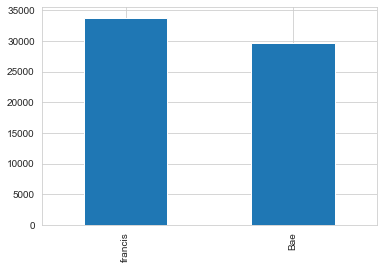

In [20]:
msg['sender'].value_counts().plot(kind='bar')

From the plot above, we can see that I send more messages to bae than the other way round.

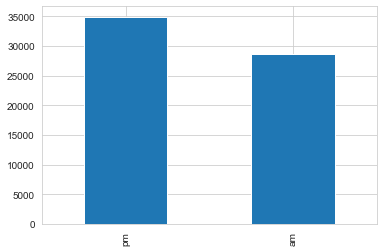

In [21]:
msg['Time_of_day'].value_counts().plot(kind='bar')

From the plot above we can see that more messages were sent at afternoons and evenings than at morning and midnights, this could have been due to the fact that a typical human resumes school or work by 8am and closes in the afternoon before they can focus on other things fully and also we are asleep almost half of the morning, 12am to 5am.

You can decide to split the data into a more precise timing like from 6am above can be morning while 12noon to 6pm can be afternoon, 6pm to 12am can be evening or night and 12am to 6am midnight or early morning. This can be done using the Time_of_day column and the time column, you can try it out.

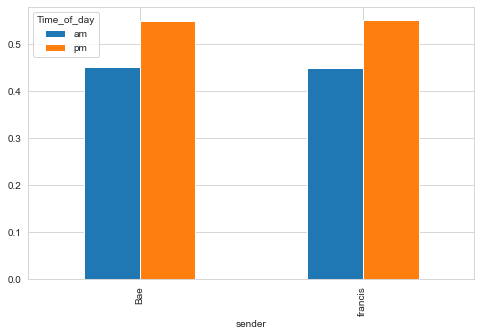

In [22]:
time = pd.crosstab(msg['sender'], msg['Time_of_day'])
time.div(time.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, figsize=(8,5))

from the above plot we can see and its expected that we both chat more at night, no one would keep sending messages when the other is not replying.

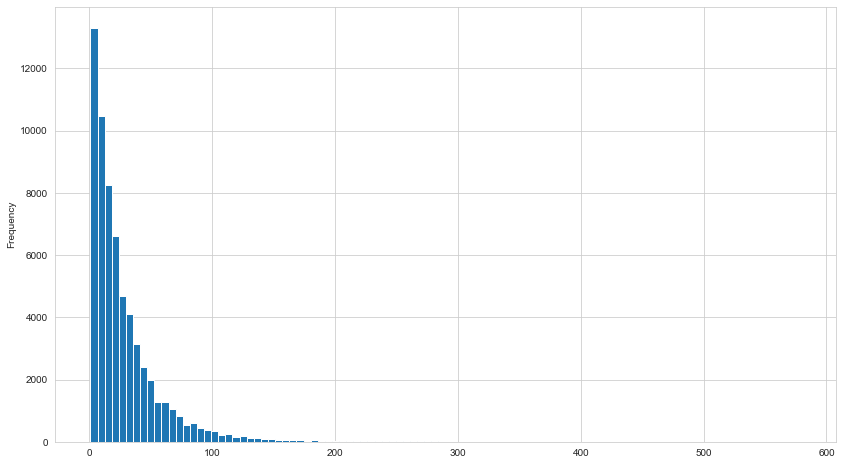

In [23]:
msg['length'].plot(bins=100, kind='hist', figsize=(14,8)) 

Play around with the bin size! Looks like text length may be a good feature to think about! Let's try to explain why the x-axis goes all the way to 600ish, this must mean that there is some really long message!

In [24]:
francis = msg[msg['sender']=='francis']['length'].max()
bae = msg[msg['sender']=='Bae']['length'].max()

print(f'{francis} long message sent by Francis\n')
print(f'{bae} long message sent by bae')

478 long message sent by Francis

579 long message sent by bae


Woah! 579 and 478 characters, well well although I sent more number of messages, we can see that she senfs the longest messages, hmmmmmmmmm. 

Let's use masking to find these messages:

In [25]:
msg[msg['length'] == 579]['message'].iloc[0]

' If there was one thing he ever got right, it was believing in himself enough to pursue his dreams. Thinking about it now, nothing couldve prepared me for the times ahead. Right before my eyes, he grew from an awkward kid who always played alone, always whispering to himself like he was better company to himself than the rest of the other kids around. Well, in the end, I guess he was. When we met, I couldve sworn he had the most interesting personality Id encountered. At 6, he had a clear view of how the world worked. I was 15 then, and I didnt even know who was president.'

In [26]:
# I dont want you all to read this one
msg[msg['length']==478]['message']

53263     But you remember the day we were returning fr...
Name: message, dtype: object

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000164214A1828>,
      dtype=object)

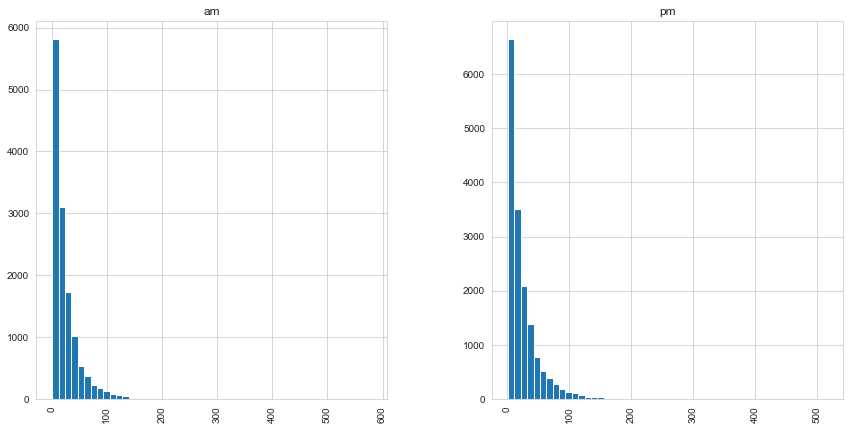

In [27]:
msg[msg['sender']=='Bae'].hist(column='length', by='Time_of_day', bins=50, figsize=(14,7))

Woah, she sends more shorter messages at night, what could cause that? Also looking between the 100 and 200 tick, we can see that the number of messages she sends reduces in the evening than morning, although it seem like we have some long messages there.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000164213CBDA0>,
      dtype=object)

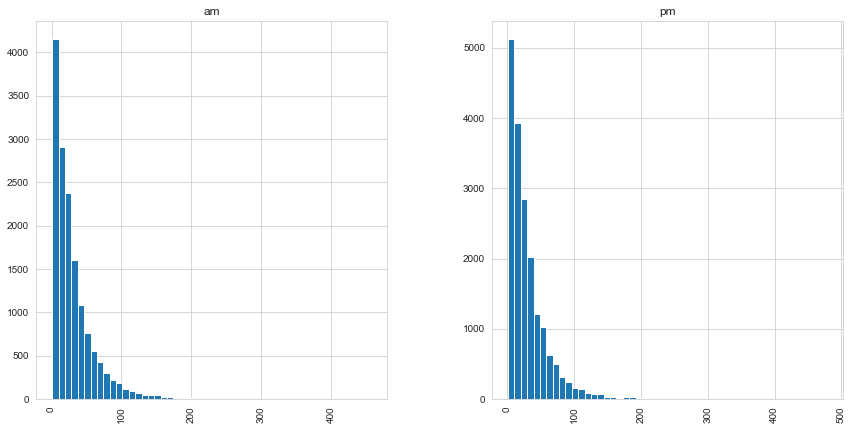

In [28]:
msg[msg['sender']=='francis'].hist(column='length', by='Time_of_day', bins=50, figsize=(14,7))

WoW! Same thing for me... I send more short messages at night but we can also see that between the 100-200 tick on the x-axis that I send a couple long messages in the evening.

## Text Pre-processing

As a first step, let's write a function that will split a message into its individual words and return a clean string. We'll also remove very common words, ('the', 'a', etc..). To do this we will take advantage of the NLTK library. It's pretty much the standard library in Python for processing text and has a lot of useful features. We'll only use some of the basic ones here.

Let's create a function that will process the string in the message column, then we can just use **apply()** in pandas do process all the text in the DataFrame.

First removing punctuation. We can just take advantage of Python's built-in **string** library to get a quick list of all the possible punctuation:

In [29]:
#Importing useful and needed libraries

import string
from nltk.corpus import stopwords

Now, lets create the function

In [30]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return ' '.join(clean_mess)

Here is the original DataFrame again:

In [31]:
msg.head()

Date   sender                message Time_of_day       Time  length
0  26/12/2017      Bae                Francis          am   8:17 am        8
1  26/12/2017      Bae       Merry Christmas           am   8:17 am       17
2  26/12/2017  francis   Thank you sweetheart          am   8:25 am       21
3  26/12/2017  francis      I love you dearly          am   8:25 am       18
4  26/12/2017  francis      Hope you had fun?          am   8:28 am       18

Now let's "tokenize" these messages. Tokenization is just the term used to describe the process of converting the normal text strings in to a list of tokens (words that we actually want).

Let's see an example output on on column:

**Note:**
We may get some warnings or errors that weren't in Unicode (like a British pound symbol)

In [32]:
# This will take a while to complete, you can go grab some snack or do some chores
msg['clean_list'] = msg['message'].apply(text_process)

In [33]:
# Show transformed dataframe and we can compare columns
msg.head(5)

Date   sender                message Time_of_day       Time  length  \
0  26/12/2017      Bae                Francis          am   8:17 am        8   
1  26/12/2017      Bae       Merry Christmas           am   8:17 am       17   
2  26/12/2017  francis   Thank you sweetheart          am   8:25 am       21   
3  26/12/2017  francis      I love you dearly          am   8:25 am       18   
4  26/12/2017  francis      Hope you had fun?          am   8:28 am       18   

         clean_list  
0           Francis  
1   Merry Christmas  
2  Thank sweetheart  
3       love dearly  
4          Hope fun

# Pheeeeeeeew

A lot of concepts have been used so far, now lets create a frequency dictionary of the words in the message columnin our msg dataset and use it to create a wrd cloud.

In [34]:
 with open('C:/Users/USER/Jupyter/Personal Data/clean_text.txt', 'w') as file:
        for i in msg['clean_list']:
            file.write(f'{i} ')
        file.close()

In [35]:
_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

Uploaded `clean_text.txt` (1056.65 kB)


In [37]:
myimage = calculate_frequencies(chat_history)
plt.figure(figsize=(10,6), dpi=1000)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Finally

We have our new wordcloud which doesn't contain either stopwords nor punctuations and the likes. We just decided to take the long route to achieve this.

**Worthy to Note:** These procedures we have employed so far are the elementary or basic functions of text analysis, there are other complex and more interesting things that can be done to a proper text for analysis to mention a few we have TFIDF, Vectorization and many more.

If you are gingered and feel like doing more of text/sentiment analysis or Natural Language Processing, you can check out the links below

[NLTK Book Online](http://www.nltk.org/book/)

[Kaggle Walkthrough](https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-1-for-beginners-bag-of-words)

[SciKit Learn's Tutorial](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)